# Librerías

In [3]:
import pandas as pd
pd.set_option("display.max_columns",100)
import warnings
warnings.filterwarnings("ignore")
import re
import unicodedata

from plotly.offline import plot,iplot
pd.options.plotting.backend = "plotly"
import plotly.graph_objects as go
import plotly.express as px#graficos express


import cufflinks as cf
cf.go_offline()
import numpy as np
import nltk

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pyecharts.charts import Pie
from pyecharts import options as opts

from sklearn.model_selection import train_test_split

from matplotlib import pyplot

# Funciones 

In [4]:
from functions_ok import clean_text, rename_cols, completitud, outliers_tests, calc_vif

# Calidad de datos

In [5]:
#Se imprimen los nombres de las columnas
df = pd.read_csv("IMDb movies.csv")
df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [6]:
df.shape[0]

85855

## Etiquetado de variables

In [7]:
#Se etiquetan las variables con un prefijo, dependiendo su naturaleza (c: continuas, v: nominales y ordinales, d: fechas y t:texto)
v_feats = ["country", "genre", "language"]
c_feats = ["year", "duration", 'avg_vote', 'votes','budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore','reviews_from_users', 'reviews_from_critics']
d_feats = ["date_published"]
t_feats = [ "imdb_title_id", "title", "original_title", 'director', 'writer', 'production_company', 'actors', 'description' ]

df=rename_cols(df,v_feats,"v_")
df=rename_cols(df,c_feats,"c_")
df=rename_cols(df,d_feats,"d_")
df=rename_cols(df,t_feats,"t_")
df.columns

Index(['t_imdb_title_id', 't_title', 't_original_title', 'c_year',
       'd_date_published', 'v_genre', 'c_duration', 'v_country', 'v_language',
       't_director', 't_writer', 't_production_company', 't_actors',
       't_description', 'c_avg_vote', 'c_votes', 'c_budget',
       'c_usa_gross_income', 'c_worlwide_gross_income', 'c_metascore',
       'c_reviews_from_users', 'c_reviews_from_critics'],
      dtype='object')

## Completitud


In [8]:
completitud(df)

,columna,total,completitud
0,c_metascore,72550,15.497059
1,c_usa_gross_income,70529,17.851028
2,c_budget,62145,27.616330
3,c_worlwide_gross_income,54839,36.126026
4,c_reviews_from_critics,11797,86.259391
5,c_reviews_from_users,7597,91.151360
6,t_production_company,4455,94.811019
7,t_description,2115,97.536544
8,t_writer,1572,98.169006
9,v_language,833,99.029759


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

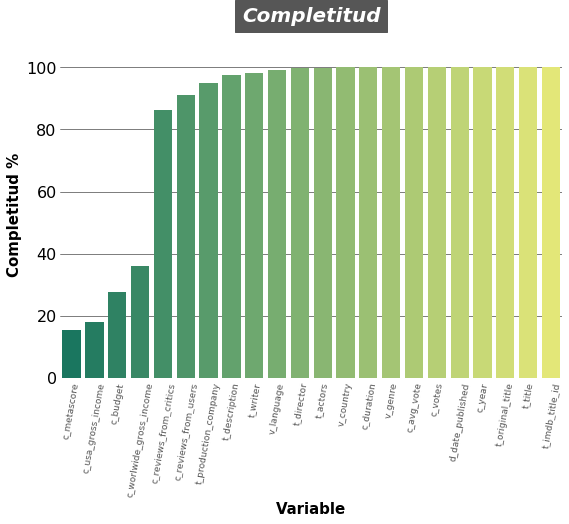

In [9]:
comple = completitud(df)
#px.bar(df_aux, x="t_production_company", y="count", color="t_production_company", title="Top 10 compañías")

fig,ax = plt.subplots(figsize=(9,6))
sns.barplot(x="columna", y="completitud",  data=comple,ci=95,ax=ax, palette = 'summer')
ax.set_title("Completitud", backgroundcolor='#565656', fontsize=20, weight='bold',color='white',
             style='italic',loc='center',pad=30)
ax.tick_params(labelsize=16,length=0) #Remove the tick line
plt.box(False) #Remove the borders of the bar chart
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

ax.set_xlabel("Variable",weight='bold',size=15)
ax.set_ylabel("Completitud %",weight='bold',size=15)
plt.xticks(rotation=80,color='#565656', size = 9)

In [10]:
df.drop(columns=['c_metascore', 'c_usa_gross_income', 'c_budget', 'c_worlwide_gross_income'],inplace=True)

In [11]:
df.columns

Index(['t_imdb_title_id', 't_title', 't_original_title', 'c_year',
       'd_date_published', 'v_genre', 'c_duration', 'v_country', 'v_language',
       't_director', 't_writer', 't_production_company', 't_actors',
       't_description', 'c_avg_vote', 'c_votes', 'c_reviews_from_users',
       'c_reviews_from_critics'],
      dtype='object')

In [12]:
df.duplicated().sum()

0

In [13]:
#También se verifica por key
df.duplicated(subset = ['t_imdb_title_id']).sum()

0

In [14]:
#con expresiones regulares vemos si hay registros que no se acoplen al formato "aaaa-mm-dd "
df[~df["d_date_published"].map(lambda x: bool(re.match(r'^\d{4}-\d{2}-\d{2}$', str(x)) )) ]

,t_imdb_title_id,t_title,t_original_title,c_year,d_date_published,v_genre,c_duration,v_country,v_language,t_director,t_writer,t_production_company,t_actors,t_description,c_avg_vote,c_votes,c_reviews_from_users,c_reviews_from_critics
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484,13.0,5.0
55,tt0005680,Maciste,Maciste,1915,1915,Adventure,67,Italy,Italian,"Luigi Romano Borgnetto, Vincenzo Denizot","Agnes Fletcher Bain, Giovanni Pastrone",Itala Film,"Bartolomeo Pagano, Leone Papa, Clementina Gay,...","A young girl, pursued by a band of conspirator...",5.9,130,3.0,5.0
100,tt0008395,Otets Sergiy,Otets Sergiy,1918,1919,"Biography, Drama, History",112,Russia,NaN,"Yakov Protazanov, Alexandre Volkoff","Leo Tolstoy, Alexandre Volkoff",Yermoliev,"Ivan Mozzhukhin, Olga Kondorova, V. Dzheneyeva...","Prince Kasatsky is a just and proud youth, sho...",7.1,458,6.0,3.0
117,tt0008879,I proscritti,Berg-Ejvind och hans hustru,1918,1919,Drama,136,Sweden,NaN,Victor Sjöström,"Victor Sjöström, Sam Ask",Svenska Biografteatern AB,"Victor Sjöström, Edith Erastoff, John Ekman, N...",A stranger comes to work at widow Halla's farm.,7.3,1518,12.0,17.0
144,tt0009900,Il ritorno al paradiso terrestre,Back to God's Country,1919,1922,"Adventure, Romance, Western",73,Canada,NaN,David Hartford,"James Oliver Curwood, James Oliver Curwood",Canadian Photoplays Ltd.,"Nell Shipman, Charles Arling, Wheeler Oakman, ...",A woman finds herself all alone in a remote ha...,6.3,857,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84788,tt8845322,Todos os Mortos,Todos os Mortos,2020,2020,Drama,120,"Brazil, France",Portuguese,"Marco Dutra, Caetano Gotardo","Marco Dutra, Caetano Gotardo",Bord Cadre Films,"Mawusi Tulani, Clarissa Kiste, Carolina Bianch...",1899. The fates of the women in two families b...,5.6,116,NaN,13.0
84835,tt8888056,When Man falls in the swamp of his thoughts an...,When Man falls in the swamp of his thoughts an...,2017,2017,Comedy,94,Egypt,Arabic,Shadi Ali,Amr Sokkar,Film Factory,"Ahmed Fathi, Bayyumi Fuad, Haya Ibrahim, Mohse...","A beauty professional (Hani), a jihadist who r...",5.3,119,3.0,NaN
84837,tt8890158,Un ascensore per due,Prescription for Love,2019,2019,"Drama, Romance",89,USA,English,Brian Brough,Brittany Wiscombe,Silver Peak Productions,"Jillian Murray, Trevor Donovan, Jillian Joy, C...",Claire's a nurse with a supervisor who is inte...,6.3,414,11.0,1.0
84868,tt8907932,Kuasha jakhon,Kuasha jakhon,2018,2018,"Drama, Horror, Mystery",104,India,Bengali,"Abhishek, Meenakshii","Abhijit Mallick, Meenakshii",Lucifer Film,"Anindya Pulak Banerjee, Rishav Basu, Gargi Roy...",t's very rare that we approach a genre like pa...,8.1,240,NaN,NaN


In [15]:
df_0 = df[df["d_date_published"].map(lambda x: bool(re.match(r'^\d{4}-\d{2}-\d{2}$', str(x)) )) ]
df_1 = df[~df["d_date_published"].map(lambda x: bool(re.match(r'^\d{4}-\d{2}-\d{2}$', str(x)) )) ]
df_1.shape[0]

4563

In [16]:
#con expresiones regulares vemos si hay registros que no se acoplen al formato  "aaaa"
df_1[~df_1["d_date_published"].map(lambda x: bool(re.match(r'^\d{4}$', str(x)) )) ]

,t_imdb_title_id,t_title,t_original_title,c_year,d_date_published,v_genre,c_duration,v_country,v_language,t_director,t_writer,t_production_company,t_actors,t_description,c_avg_vote,c_votes,c_reviews_from_users,c_reviews_from_critics
83917,tt8206668,Bad Education,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,"Mike Makowsky, Robert Kolker",HBO Films,"Hugh Jackman, Ray Romano, Welker White, Alliso...",The beloved superintendent of New York's Rosly...,7.1,23973,135.0,98.0


In [17]:
df_1 = df_1[df_1["d_date_published"].map(lambda x: bool(re.match(r'^\d{4}$', str(x)) )) ]
df_1.shape[0]

4562

In [18]:
#volvemos a juntar los df
df = pd.concat([df_0, df_1])
df.reset_index(drop=True,inplace=True)
df.shape[0]

85854

In [19]:
#forzamos a convertir d_fecha_hechos a datetime
df['d_date_published'] = pd.to_datetime(df['d_date_published'], errors='coerce')
df['d_date_published'].describe()

count                   85854
unique                  21916
top       2010-01-01 00:00:00
freq                      129
first     1894-10-09 00:00:00
last      2021-05-07 00:00:00
Name: d_date_published, dtype: object

In [20]:
df['c_year'] = df["d_date_published"].map(lambda x: x.year)
df["c_year"] =  df["c_year"].astype(int)

In [21]:
#explorar variables continuas
df.filter(like="c_").describe()

,c_year,c_duration,c_avg_vote,c_votes,c_reviews_from_users,c_reviews_from_critics
count,85854.000000,85854.000000,85854.000000,8.585400e+04,78257.000000,74057.000000
mean,1993.897139,100.351329,5.898642,9.493321e+03,46.039690,27.479036
std,24.168842,22.553964,1.234988,5.357465e+04,178.512268,58.338977
min,1894.000000,41.000000,1.000000,9.900000e+01,1.000000,1.000000
25%,1979.000000,88.000000,5.200000,2.050000e+02,4.000000,3.000000
50%,2003.000000,96.000000,6.100000,4.840000e+02,9.000000,8.000000
75%,2013.000000,108.000000,6.800000,1.766000e+03,27.000000,23.000000
max,2021.000000,808.000000,9.900000,2.278845e+06,10472.000000,999.000000


In [22]:
df.filter(like="c_").dtypes

c_year                      int32
c_duration                  int64
c_avg_vote                float64
c_votes                     int64
c_reviews_from_users      float64
c_reviews_from_critics    float64
dtype: object

## Limpieza de variables con texto

In [23]:
#vamos a hacer una copia de las variables originales
vars_text = ['t_original_title', 'v_genre', 'v_country', 'v_language', 't_director', 't_writer', 't_production_company', 't_actors', 't_description']

for var in vars_text:
    df[var+"_orig"] = df[var]

In [24]:
#vamos a definir las variables a las que se les puede aplicar limpieza de texto
#no vamos a quitar los números porque en nombres de películas puede ser útil


for var in vars_text:
    df[var]=df[var].map(lambda x: x if pd.isnull(x) else clean_text(str(x), pattern="[^,a-zA-Z]"))
    

In [25]:
#quitamos stop words
stop_words=nltk.corpus.stopwords.words(["english", "spanish", "french", "german", "portuguese", "italian"])
for var in vars_text:
  df[var]=df[var].map(lambda text:text if pd.isnull(text) else " ".join([x for x in text.split(" ") if x not in stop_words]))#

In [26]:
for col in vars_text:
    print(col)
    display(df[col].value_counts())
    print("\n")

t_original_title


                   630
love                55
go                  20
life                19
x                   18
                  ... 
galloping ghost      1
riders               1
aquanoids            1
cube zero            1
amai yoru hate       1
Name: t_original_title, Length: 75400, dtype: int64



v_genre


drama                      12543
comedy                      7693
comedy, drama               4039
drama, romance              3455
comedy, romance             2508
                           ...  
fantasy, music, romance        1
musical, sci fi                1
adventure, musical             1
crime, horror, music           1
family, music, musical         1
Name: v_genre, Length: 1257, dtype: int64



v_country


usa                                  28510
india                                 6065
uk                                    4111
japan                                 3077
france                                3055
                                     ...  
burkina faso, france, switzerland        1
france, china, germany                   1
usa, latvia                              1
luxembourg, germany, uk                  1
soviet union, sweden, canada             1
Name: v_country, Length: 4907, dtype: int64



v_language


english                            35938
french                              3903
spanish                             2831
japanese                            2826
italian                             2731
                                   ...  
welsh, spanish, english, polish        1
mandarin, italian, english             1
finnish, greek, english                1
english, italian, french, welsh        1
german, czech, latin                   1
Name: v_language, Length: 4377, dtype: int64



t_director


jesus franco                 87
michael curtiz               85
lesley selander              78
lloyd bacon                  73
william beaudine             70
                             ..
preston defrancis             1
bob rafelson, ken russell     1
stanley jacobs                1
dave wilson                   1
cejen cernic                  1
Name: t_director, Length: 34644, dtype: int64



t_writer


jing wong                              84
kuang                                  45
woody                                  40
erdogan tunas                          35
leonardo benvenuti, piero bernardi     34
                                       ..
sang oh                                 1
gianrico carofiglio, daniele vicari     1
leonard lee, frank gruber               1
hyeon kim, soo ah kim                   1
daouda coulibaly                        1
Name: t_writer, Length: 66816, dtype: int64



t_production_company


metro goldwyn mayer mgm    1284
warner bros                1153
columbia pictures           914
paramount pictures          903
twentieth century fox       865
                           ... 
magic shop                    1
rooz film                     1
atchafalaya                   1
underclassman films ltd       1
movie company                 1
Name: t_production_company, Length: 31031, dtype: int64



t_actors


nobuyo oyama, noriko ohara, michiko nomura, kaneta kimotsuki, kazuya tatekabe                                                                                                                                                                     9
bill corbett, kevin murphy, michael nelson                                                                                                                                                                                                        6
sergey                                                                                                                                                                                                                                            6
keiji fujiwara, satomi korogi, miki narahashi, akiko yajima                                                                                                                                                                                       4
trace beaulieu, frank co



t_description


story                                                                                                                                            17
                                                                                                                                                 10
sequel                                                                                                                                            9
based                                                                                                                                             6
mail                                                                                                                                              6
                                                                                                                                                 ..
vastly different people collide mysterious black box shows owner desires, payback comes form immortal assassin  

# Análisis Exploratorio

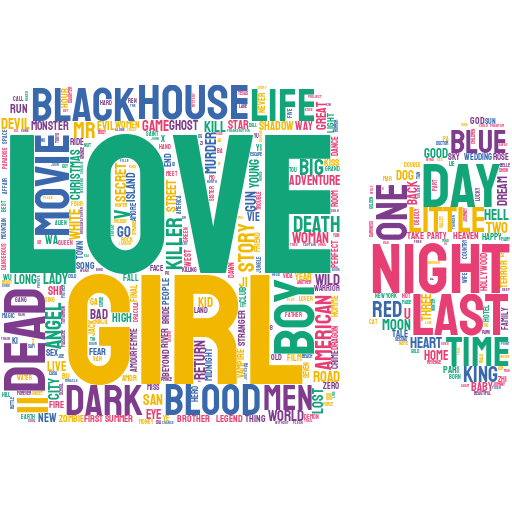

In [27]:
#wordclouds de variables con texto
import stylecloud
from PIL import Image

corpus=" ".join(df["t_original_title"].values)

with open(r"C:\Users\zaju9001\Documents\Diplomado Ciencia de Datos\Modulo1\Proyecto\t_original_title.txt","w") as f:
        f.write(corpus)

path_texto=r"C:\Users\zaju9001\Documents\Diplomado Ciencia de Datos\Modulo1\Proyecto\t_original_title.txt"
path_imagen=r"C:\Users\zaju9001\Documents\Diplomado Ciencia de Datos\Modulo1\Proyecto\t_original_title.png"
#https://fontawesome.com/icons?d=gallery&m=free
stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen, icon_name="fas fa-video",
                         background_color="rgba(255, 255, 255, 0)" ) #ticket-alt

Image.open(path_imagen)

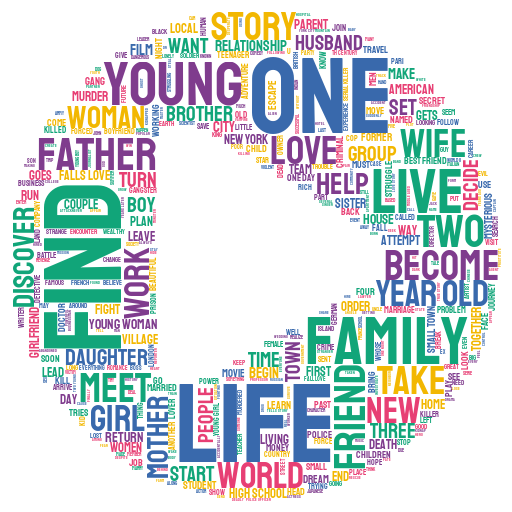

In [28]:
corpus=" ".join(df["t_description"].fillna("").values)

with open(r"C:\Users\zaju9001\Documents\Diplomado Ciencia de Datos\Modulo1\Proyecto\t_description.txt","w") as f:
        f.write(corpus)

path_texto=r"C:\Users\zaju9001\Documents\Diplomado Ciencia de Datos\Modulo1\Proyecto\t_description.txt"
path_imagen=r"C:\Users\zaju9001\Documents\Diplomado Ciencia de Datos\Modulo1\Proyecto\t_description.png"
#https://fontawesome.com/icons?d=gallery&m=free
stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen, icon_name="fas fa-play-circle") #ticket-alt

Image.open(path_imagen)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

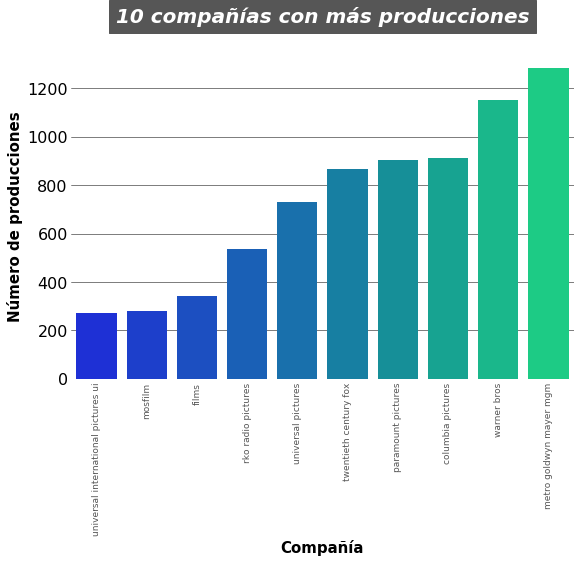

In [29]:
df_aux = df.groupby(by=["t_production_company"]).size().reset_index(name="count").sort_values(by = "count", ascending = True).tail(10)
#px.bar(df_aux, x="t_production_company", y="count", color="t_production_company", title="Top 10 compañías")

fig,ax = plt.subplots(figsize=(9,6))
sns.barplot(x="t_production_company", y="count",  data=df_aux,ci=95,ax=ax, palette = 'winter')
ax.set_title("10 compañías con más producciones", backgroundcolor='#565656', fontsize=20, weight='bold',color='white',
             style='italic',loc='center',pad=30)
ax.tick_params(labelsize=16,length=0) #Remove the tick line
plt.box(False) #Remove the borders of the bar chart
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

ax.set_xlabel("Compañía",weight='bold',size=15)
ax.set_ylabel("Número de producciones",weight='bold',size=15)
plt.xticks(rotation=90,color='#565656', size = 9)

In [30]:
df_aux["count"].sum()/df.shape[0]

0.08479511729214713

Text(0.5, 1.0, 'Distribución del año de estreno')

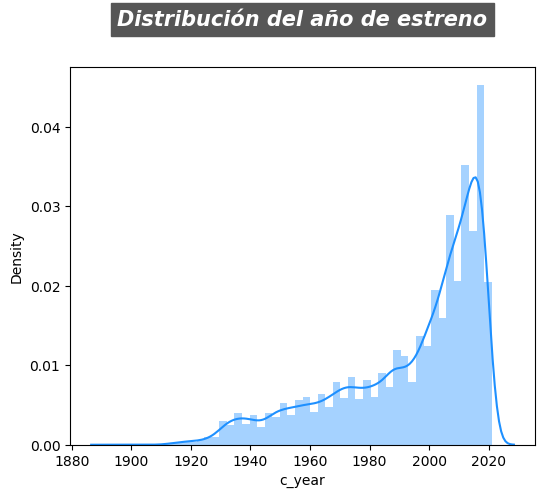

In [31]:
plt.subplots(figsize=(6,5), dpi=100)
sns.distplot( df["c_year"] , color="dodgerblue")
plt.title('Distribución del año de estreno', backgroundcolor='#565656', fontsize=15, weight='bold',color='white',
             style='italic',loc='center',pad=30)

In [32]:
#vamos a crear variables para la fecha
df['v_day_week'] = df['d_date_published'].dt.strftime('%A')
df["v_weekend"] = np.where(df['v_day_week'].isin(["Saturday", "Sunday"]), 1,0)
df['v_day_month'] = df['d_date_published'].dt.strftime('%d')

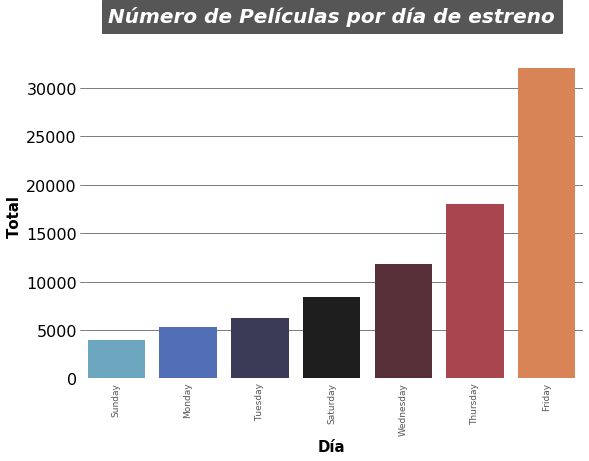

In [33]:
#análisis del día
df_aux = df.groupby(by=["v_day_week"]).size().reset_index(name="count").sort_values(by = "count", ascending = True)
fig,ax = plt.subplots(figsize=(9,6))
sns.barplot(x="v_day_week", y="count",  data=df_aux,ci=95,ax=ax, palette = 'icefire')
ax.set_title("Número de Películas por día de estreno", backgroundcolor='#565656', fontsize=20, weight='bold',color='white',
             style='italic',loc='center',pad=30)
ax.tick_params(labelsize=16,length=0) #Remove the tick line
plt.box(False) #Remove the borders of the bar chart
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

ax.set_xlabel("Día",weight='bold',size=15)
ax.set_ylabel("Total",weight='bold',size=15)
plt.xticks(rotation=90,color='#565656', size = 9)
plt.savefig('temp.png', transparent=True)

In [34]:
df_aux = df.groupby(by=["v_day_week"]).size().reset_index(name="count").sort_values(by = "count", ascending = False)
px.pie(df_aux, values='count', names='v_day_week', title='Distribución por día de estreno')


In [35]:
df_aux = df.groupby(by=["v_weekend"]).size().reset_index(name="count").sort_values(by = "count", ascending = False)
px.pie(df_aux, values='count', names='v_weekend', title='Películas con estreno en fin de semana').update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})

Text(0.5, 1.0, 'Distribución del día de estreno')

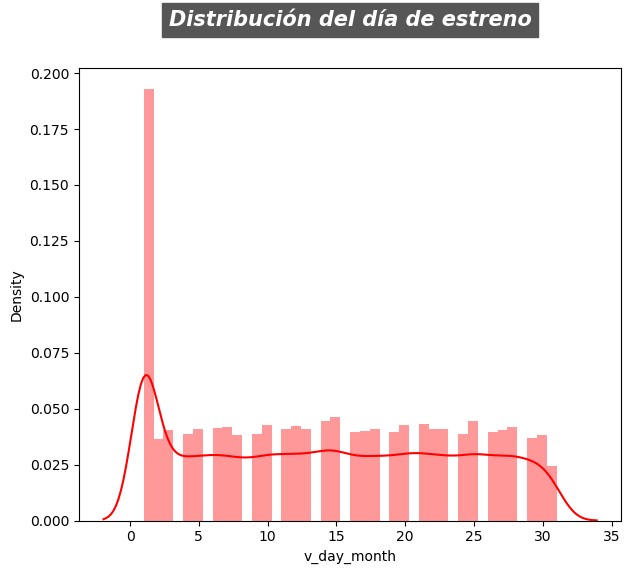

In [36]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df["v_day_month"] , color="red")
plt.title('Distribución del día de estreno', backgroundcolor='#565656', fontsize=15, weight='bold',color='white',
             style='italic',loc='center',pad=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

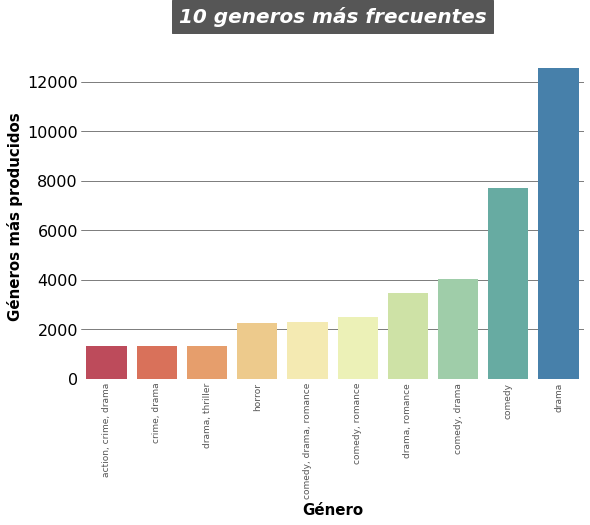

In [37]:
df_aux = df.groupby(by=["v_genre"]).size().reset_index(name="count").sort_values(by = "count", ascending = True).tail(10)
#px.bar(df_aux, x="t_production_company", y="count", color="t_production_company", title="Top 10 compañías")

fig,ax = plt.subplots(figsize=(9,6))
sns.barplot(x="v_genre", y="count",  data=df_aux,ci=95,ax=ax, palette = 'Spectral')
ax.set_title("10 generos más frecuentes", backgroundcolor='#565656', fontsize=20, weight='bold',color='white',
             style='italic',loc='center',pad=30)
ax.tick_params(labelsize=16,length=0) #Remove the tick line
plt.box(False) #Remove the borders of the bar chart
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

ax.set_xlabel("Género",weight='bold',size=15)
ax.set_ylabel("Géneros más producidos",weight='bold',size=15)
plt.xticks(rotation=90,color='#565656', size = 9)

Text(0.5, 1.0, 'Distribución de la duración en minutos')

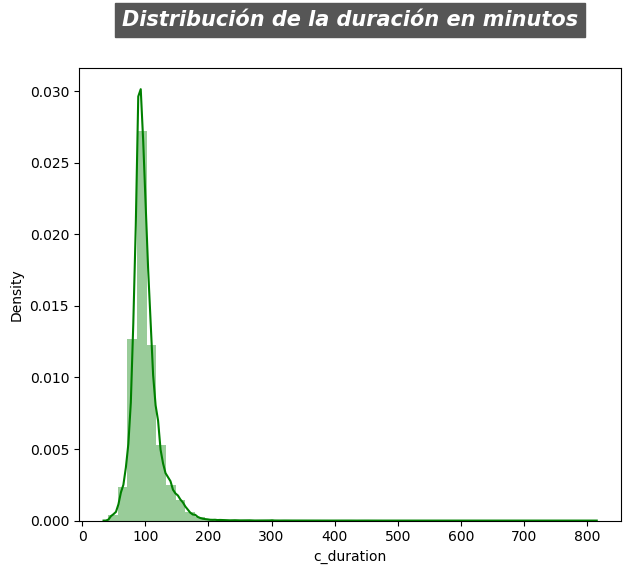

In [38]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df["c_duration"] , color="green")
plt.title('Distribución de la duración en minutos', backgroundcolor='#565656', fontsize=15, weight='bold',color='white',
             style='italic',loc='center',pad=30)

Text(0.5, 1.0, 'Distribución de la duración en horas')

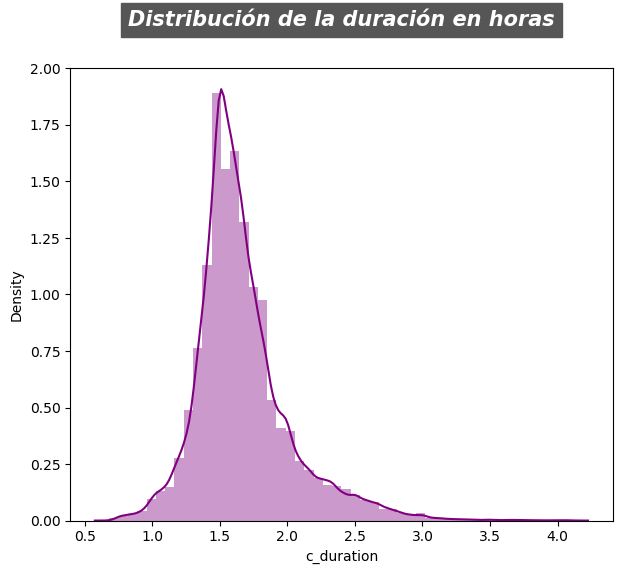

In [39]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df["c_duration"][df["c_duration"] < 250]/60 , color="purple")
plt.title('Distribución de la duración en horas', backgroundcolor='#565656', fontsize=15, weight='bold',color='white',
             style='italic',loc='center',pad=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

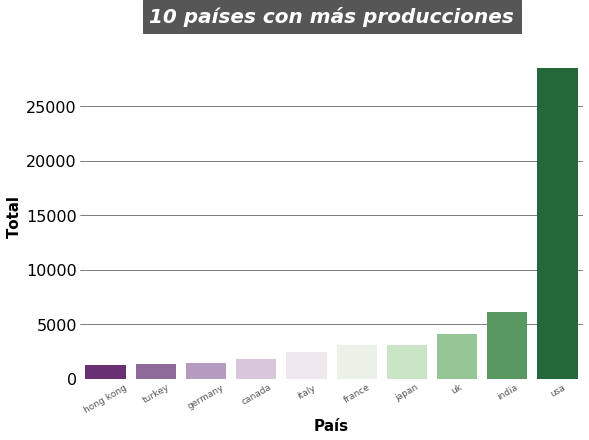

In [40]:
df_aux = df.groupby(by=["v_country"]).size().reset_index(name="count").sort_values(by = "count", ascending = True).tail(10)
#px.bar(df_aux, x="t_production_company", y="count", color="t_production_company", title="Top 10 compañías")

fig,ax = plt.subplots(figsize=(9,6))
sns.barplot(x="v_country", y="count",  data=df_aux,ci=95,ax=ax, palette = 'PRGn')
ax.set_title("10 países con más producciones", backgroundcolor='#565656', fontsize=20, weight='bold',color='white',
             style='italic',loc='center',pad=30)
ax.tick_params(labelsize=16,length=0) #Remove the tick line
plt.box(False) #Remove the borders of the bar chart
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

ax.set_xlabel("País",weight='bold',size=15)
ax.set_ylabel("Total",weight='bold',size=15)
plt.xticks(rotation=30,color='#565656', size = 9)

In [41]:
28510/df.shape[0]

0.3320753837910872

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

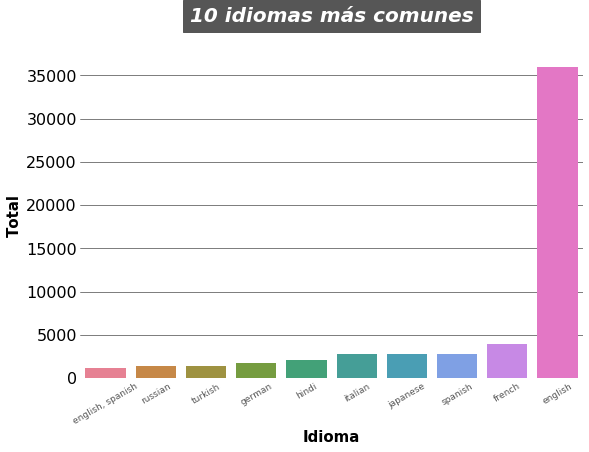

In [42]:
df_aux = df.groupby(by=["v_language"]).size().reset_index(name="count").sort_values(by = "count", ascending = True).tail(10)
#px.bar(df_aux, x="t_production_company", y="count", color="t_production_company", title="Top 10 compañías")

fig,ax = plt.subplots(figsize=(9,6))
sns.barplot(x="v_language", y="count",  data=df_aux,ci=95,ax=ax, palette = 'husl')
ax.set_title("10 idiomas más comunes", backgroundcolor='#565656', fontsize=20, weight='bold',color='white',
             style='italic',loc='center',pad=30)
ax.tick_params(labelsize=16,length=0) #Remove the tick line
plt.box(False) #Remove the borders of the bar chart
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)

ax.set_xlabel("Idioma",weight='bold',size=15)
ax.set_ylabel("Total",weight='bold',size=15)
plt.xticks(rotation=30,color='#565656', size = 9)

Text(0.5, 1.0, 'Distribución del número de votos')

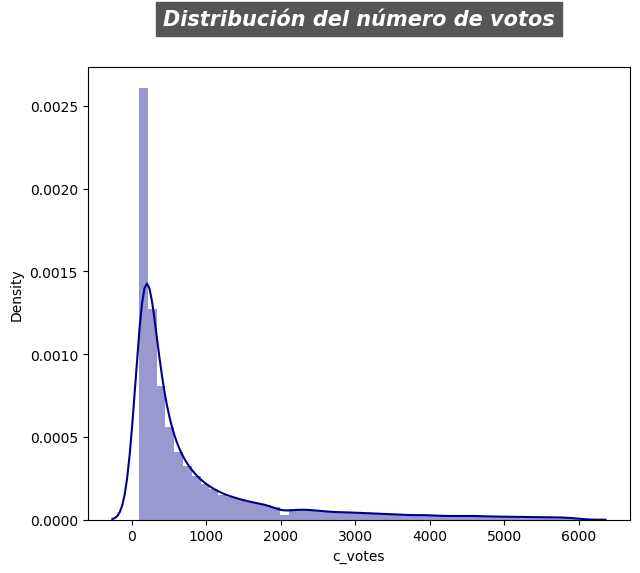

In [43]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df["c_votes"][df["c_votes"] < 6000] , color="darkblue")
plt.title('Distribución del número de votos', backgroundcolor='#565656', fontsize=15, weight='bold',color='white',
             style='italic',loc='center',pad=30)

In [44]:
px.violin(df, x="c_avg_vote", box = True)

Text(0.5, 1.0, 'Distribución del promedio de votos')

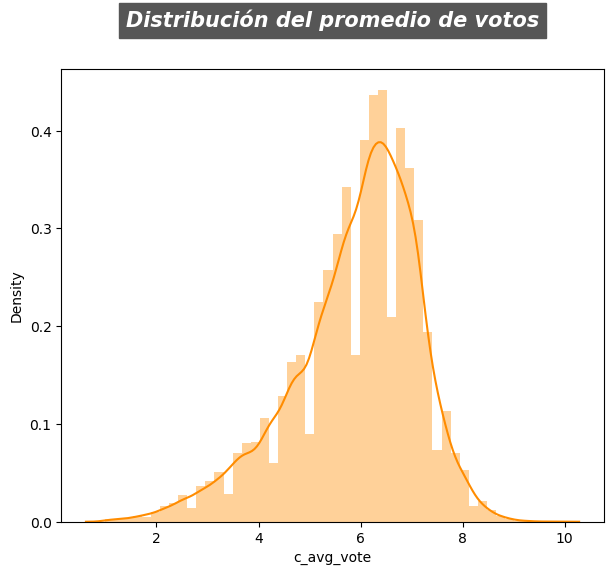

In [45]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df["c_avg_vote"] , color="darkorange")
plt.title('Distribución del promedio de votos', backgroundcolor='#565656', fontsize=15, weight='bold',color='white',
             style='italic',loc='center',pad=30)

# Ingeniería de Variables

In [46]:
#t_original_title
df["t_original_title_orig"] = df["t_original_title_orig"].map(lambda x: x.split())
df['c_num_words'] = df["t_original_title_orig"].apply(lambda x: len(x))
df['c_num_letters'] =df["t_original_title_orig"].map(lambda x: sum(len(word) for word in x))
df['c_long_avg_word'] = df['c_num_letters'] / df['c_num_words']
df[["t_original_title_orig", "c_num_words", "c_num_letters", "c_long_avg_word"]]

,t_original_title_orig,c_num_words,c_num_letters,c_long_avg_word
0,"[Miss, Jerry]",2,9,4.500000
1,"[The, Story, of, the, Kelly, Gang]",6,22,3.666667
2,"[Den, sorte, drøm]",3,12,4.000000
3,[Cleopatra],1,9,9.000000
4,[L'Inferno],1,9,9.000000
...,...,...,...,...
85849,"[Todos, os, Mortos]",3,13,4.333333
85850,"[When, Man, falls, in, the, swamp, of, his, th...",17,62,3.647059
85851,"[Prescription, for, Love]",3,19,6.333333
85852,"[Kuasha, jakhon]",2,12,6.000000


In [47]:
#verificamos que no haya registros con 0 palabras en título
df[df['c_num_words'] == 0]

,t_imdb_title_id,t_title,t_original_title,c_year,d_date_published,v_genre,c_duration,v_country,v_language,t_director,t_writer,t_production_company,t_actors,t_description,c_avg_vote,c_votes,c_reviews_from_users,c_reviews_from_critics,t_original_title_orig,v_genre_orig,v_country_orig,v_language_orig,t_director_orig,t_writer_orig,t_production_company_orig,t_actors_orig,t_description_orig,v_day_week,v_weekend,v_day_month,c_num_words,c_num_letters,c_long_avg_word


In [48]:
from nltk import FreqDist

df["v_genre_orig"] = df["v_genre_orig"].map(lambda x: x.replace("-", "").replace(",", ""))
corpus=" ".join(df["v_genre_orig"].values)
fdist=FreqDist(corpus.split())
list(fdist)

['Romance',
 'Biography',
 'Crime',
 'Drama',
 'History',
 'Adventure',
 'Fantasy',
 'War',
 'Mystery',
 'Horror',
 'Western',
 'Comedy',
 'Family',
 'Action',
 'SciFi',
 'Thriller',
 'Sport',
 'Musical',
 'Music',
 'FilmNoir',
 'Animation',
 'Adult',
 'Documentary',
 'RealityTV',
 'News']

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(df["v_genre_orig"])#Se aprende de las palabras en train
array_train = vect.transform(df["v_genre_orig"])#Se transforman los datos de train para obtener el conteo por palabra
aux_train=pd.DataFrame(array_train.toarray(),columns=vect.get_feature_names())
df=pd.concat([df,aux_train],axis=1)
df

,t_imdb_title_id,t_title,t_original_title,c_year,d_date_published,v_genre,c_duration,v_country,v_language,t_director,t_writer,t_production_company,t_actors,t_description,c_avg_vote,c_votes,c_reviews_from_users,c_reviews_from_critics,t_original_title_orig,v_genre_orig,v_country_orig,v_language_orig,t_director_orig,t_writer_orig,t_production_company_orig,t_actors_orig,t_description_orig,v_day_week,v_weekend,v_day_month,c_num_words,c_num_letters,c_long_avg_word,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,filmnoir,history,horror,music,musical,mystery,news,realitytv,romance,scifi,sport,thriller,war,western
0,tt0000009,Miss Jerry,miss jerry,1894,1894-10-09,romance,45,usa,none,alexander black,alexander black,alexander black photoplays,"blanche bayliss, william courtenay, chauncey d...",adventures female reporter,5.9,154,1.0,2.0,"[Miss, Jerry]",Romance,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,Tuesday,0,09,2,9,4.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,tt0000574,The Story of the Kelly Gang,story kelly gang,1906,1906-12-26,"biography, crime, drama",70,australia,none,charles tait,charles tait,tait,"elizabeth tait, john tait, norman campbell, be...",true story notorious australian outlaw ned kelly,6.1,589,7.0,7.0,"[The, Story, of, the, Kelly, Gang]",Biography Crime Drama,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,Wednesday,0,26,6,22,3.666667,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0001892,Den sorte drøm,sorte drm,1911,1911-08-19,drama,53,"germany, denmark",NaN,urban gad,"urban gad, gebhard schatzler perasini",fotorama,"asta nielsen, valdemar psilander, gunnar helse...",two men high rank wooing beautiful famous eque...,5.8,188,5.0,2.0,"[Den, sorte, drøm]",Drama,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,Saturday,1,19,3,12,4.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0002101,Cleopatra,cleopatra,1912,1912-11-13,"drama, history",100,usa,english,charles gaskill,victorien sardou,helen gardner picture players,"helen gardner, pearl sindelar, miss fielding, ...",fabled queen egypt affair roman general marc a...,5.2,446,25.0,3.0,[Cleopatra],Drama History,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,Wednesday,0,13,1,9,9.000000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,tt0002130,L'Inferno,inferno,1911,1911-03-06,"adventure, drama, fantasy",68,italy,italian,"francesco bertolini, adolfo padovan",dante alighieri,milano film,"salvatore papa, arturo pirovano, giuseppe ligu...",loosely adapted dante divine comedy inspired i...,7.0,2237,31.0,14.0,[L'Inferno],Adventure Drama Fantasy,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,Monday,0,06,1,9,9.000000,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85849,tt8845322,Todos os Mortos,mortos,2020,2020-01-01,drama,120,"brazil, france",portuguese,"marco dutra, caetano gotardo","marco dutra, caetano gotardo",bord cadre films,"mawusi tulani, clarissa kiste, carolina bianch...",fates women two families become entangled soar...,5.6,116,NaN,13.0,"[Todos, os, Mortos]",Drama,"Brazil, France",Portuguese,"Marco Dutra, Caetano Gotardo","Marco D

In [50]:
df["c_duration"].describe()

count    85854.000000
mean       100.351329
std         22.553964
min         41.000000
25%         88.000000
50%         96.000000
75%        108.000000
max        808.000000
Name: c_duration, dtype: float64

In [51]:
#df["v_country"].isnull().sum()
df["v_country_usa"] = df['v_country'].map(lambda x : x if pd.isnull(x) else np.where("usa" in x, 1,0) )
df["v_country_usa"].value_counts()


0.0    51466
1.0    34324
Name: v_country_usa, dtype: int64

In [52]:
#df["v_language"].isnull().sum()
df["v_language_en"] = df['v_language'].map(lambda x : x if pd.isnull(x) else np.where("english" in x, 1,0) )
df["v_language_en"].value_counts()

1.0    47445
0.0    37576
Name: v_language_en, dtype: int64

In [53]:
df['t_production_company'].value_counts(1)

metro goldwyn mayer mgm    0.015774
warner bros                0.014165
columbia pictures          0.011229
paramount pictures         0.011094
twentieth century fox      0.010627
                             ...   
magic shop                 0.000012
rooz film                  0.000012
atchafalaya                0.000012
underclassman films ltd    0.000012
movie company              0.000012
Name: t_production_company, Length: 31031, dtype: float64

In [54]:
df["c_n_actors"] = df["t_actors"].map(lambda x: x if pd.isnull(x) else len(x.split(",")))
df[["t_actors","c_n_actors" ]]

,t_actors,c_n_actors
0,"blanche bayliss, william courtenay, chauncey d...",3.0
1,"elizabeth tait, john tait, norman campbell, be...",13.0
2,"asta nielsen, valdemar psilander, gunnar helse...",6.0
3,"helen gardner, pearl sindelar, miss fielding, ...",13.0
4,"salvatore papa, arturo pirovano, giuseppe ligu...",7.0
...,...,...
85849,"mawusi tulani, clarissa kiste, carolina bianch...",15.0
85850,"ahmed fathi, bayyumi fuad, ibrahim, mohsen man...",6.0
85851,"jillian murray, trevor donovan, jillian joy, c...",15.0
85852,"anindya pulak banerjee, rishav basu, gargi roy...",8.0


In [55]:
df_orig = df.copy()

In [56]:
df = df_orig[['t_imdb_title_id','c_year', 'c_duration', 'c_avg_vote', 'c_votes', 'c_reviews_from_users',
       'c_reviews_from_critics', 'v_day_week', 'v_weekend', 'v_day_month', 'c_num_words',
       'c_num_letters', 'c_long_avg_word', 'action', 'adult', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'filmnoir', 'history', 'horror', 'music',
       'musical', 'mystery', 'news', 'realitytv', 'romance', 'scifi', 'sport',
       'thriller', 'war', 'western', 'v_country_usa', 'v_language_en',
       'c_n_actors']]
df.dtypes

t_imdb_title_id            object
c_year                      int32
c_duration                  int64
c_avg_vote                float64
c_votes                     int64
c_reviews_from_users      float64
c_reviews_from_critics    float64
v_day_week                 object
v_weekend                   int32
v_day_month                object
c_num_words                 int64
c_num_letters               int64
c_long_avg_word           float64
action                      int64
adult                       int64
adventure                   int64
animation                   int64
biography                   int64
comedy                      int64
crime                       int64
documentary                 int64
drama                       int64
family                      int64
fantasy                     int64
filmnoir                    int64
history                     int64
horror                      int64
music                       int64
musical                     int64
mystery       

In [57]:
dicti = {'Tuesday':2, 'Wednesday':3, 'Saturday':6, 'Monday':1, 'Sunday':7, 'Friday':5,
       'Thursday':4}
df["v_day_week"] = df["v_day_week"].map(dicti)
df["v_day_week"].value_counts()

5    32079
4    18013
3    11865
6     8394
2     6236
1     5340
7     3927
Name: v_day_week, dtype: int64

In [58]:
#int(df["v_day_month"].unique()[0])
df["v_day_month"] = df["v_day_month"].map(lambda x: int(x))

In [59]:
df.dtypes

t_imdb_title_id            object
c_year                      int32
c_duration                  int64
c_avg_vote                float64
c_votes                     int64
c_reviews_from_users      float64
c_reviews_from_critics    float64
v_day_week                  int64
v_weekend                   int32
v_day_month                 int64
c_num_words                 int64
c_num_letters               int64
c_long_avg_word           float64
action                      int64
adult                       int64
adventure                   int64
animation                   int64
biography                   int64
comedy                      int64
crime                       int64
documentary                 int64
drama                       int64
family                      int64
fantasy                     int64
filmnoir                    int64
history                     int64
horror                      int64
music                       int64
musical                     int64
mystery       

In [60]:
df.reset_index(drop = True, inplace = True)

# Outliers

In [61]:
var_c = ['c_year', 'c_duration',  'c_votes', 'c_reviews_from_users',
       'c_reviews_from_critics', 'c_num_words', 'c_num_letters',
       'c_long_avg_word', 'c_n_actors']

In [62]:
df.shape

(85854, 41)

Para la columna c_year se tiene:
Número de outliers por IQR: 625
Número de outliers por percentiles .5 y .95: 5636
Los datos no distribuyen normal, se hará una transformación de boxcox
Los datos transformados distribuyen normal
Número de outliers por z-score: 281
Hay 281 outliers comúnes = 0.0032729983460293055%


count     281.000000
mean     1917.455516
std         3.079711
min      1894.000000
10%      1914.000000
20%      1915.000000
30%      1916.000000
40%      1917.000000
50%      1918.000000
60%      1919.000000
70%      1920.000000
80%      1920.000000
90%      1921.000000
100%     1921.000000
max      1921.000000
Name: c_year, dtype: float64

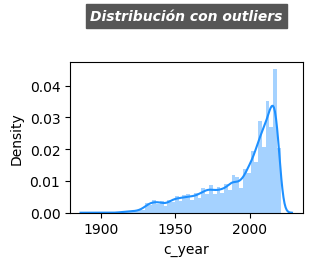

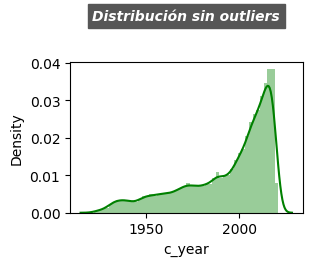

Para la columna c_duration se tiene:
Número de outliers por IQR: 5822
Número de outliers por percentiles .5 y .95: 8353
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 4877 outliers comúnes = 0.05680573997717055%


count    4877.000000
mean      150.387943
std        48.025847
min        41.000000
10%        56.000000
20%       145.000000
30%       148.000000
40%       150.000000
50%       154.000000
60%       158.000000
70%       162.000000
80%       169.000000
90%       181.000000
100%      808.000000
max       808.000000
Name: c_duration, dtype: float64

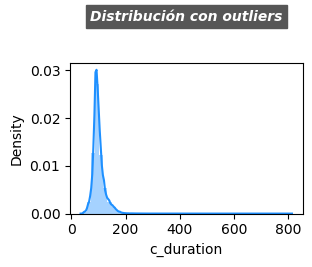

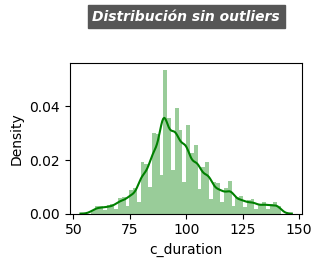

Para la columna c_votes se tiene:
Número de outliers por IQR: 13564
Número de outliers por percentiles .5 y .95: 8374
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 4293 outliers comúnes = 0.05000349430428402%


count    4.293000e+03
mean     1.523691e+05
std      1.885480e+05
min      3.344000e+04
10%      3.977400e+04
20%      4.723580e+04
30%      5.617960e+04
40%      6.980600e+04
50%      8.646700e+04
60%      1.088070e+05
70%      1.444762e+05
80%      2.059198e+05
90%      3.371056e+05
100%     2.278845e+06
max      2.278845e+06
Name: c_votes, dtype: float64

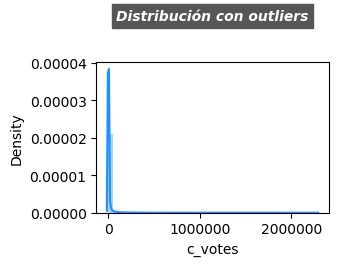

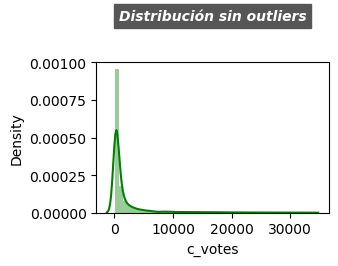

Para la columna c_reviews_from_users se tiene:
Número de outliers por IQR: 10214
Número de outliers por percentiles .5 y .95: 3897
Los datos distribuyen normal
Número de outliers por z-score: 1006
Hay 1006 outliers comúnes = 0.011717567032403849%


count     1006.000000
mean      1174.893638
std        919.384580
min        582.000000
10%        627.000000
20%        672.000000
30%        722.000000
40%        791.000000
50%        889.500000
60%        976.000000
70%       1158.000000
80%       1422.000000
90%       2058.000000
100%     10472.000000
max      10472.000000
Name: c_reviews_from_users, dtype: float64

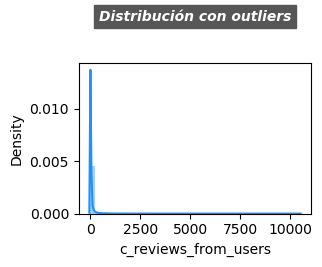

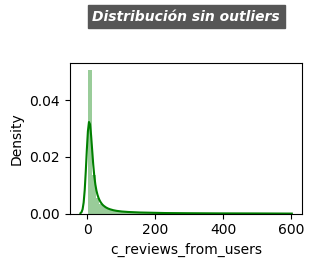

Para la columna c_reviews_from_critics se tiene:
Número de outliers por IQR: 9231
Número de outliers por percentiles .5 y .95: 3682
Los datos distribuyen normal
Número de outliers por z-score: 1742
Hay 1742 outliers comúnes = 0.02029026020919235%


count    1742.000000
mean      321.345006
std       114.464981
min       203.000000
10%       216.000000
20%       230.000000
30%       244.000000
40%       263.000000
50%       285.000000
60%       311.000000
70%       348.700000
80%       401.000000
90%       473.000000
100%      999.000000
max       999.000000
Name: c_reviews_from_critics, dtype: float64

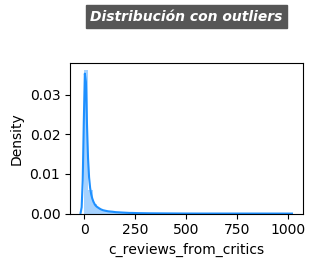

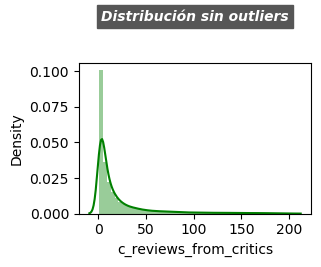

Para la columna c_num_words se tiene:
Número de outliers por IQR: 1191
Número de outliers por percentiles .5 y .95: 2368
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 1191 outliers comúnes = 0.013872388007547698%


count    1191.000000
mean        9.211587
std         2.016045
min         8.000000
10%         8.000000
20%         8.000000
30%         8.000000
40%         8.000000
50%         9.000000
60%         9.000000
70%         9.000000
80%        10.000000
90%        11.000000
100%       37.000000
max        37.000000
Name: c_num_words, dtype: float64

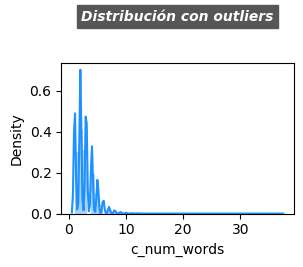

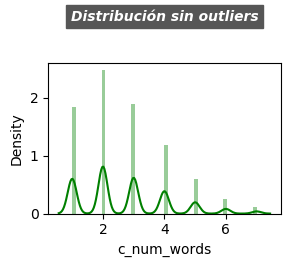

Para la columna c_num_letters se tiene:
Número de outliers por IQR: 2885
Número de outliers por percentiles .5 y .95: 6060
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 2885 outliers comúnes = 0.03360355953129732%


count    2885.000000
mean       37.017678
std         8.767890
min        30.000000
10%        30.000000
20%        31.000000
30%        32.000000
40%        33.000000
50%        34.000000
60%        36.000000
70%        38.000000
80%        41.000000
90%        47.000000
100%      160.000000
max       160.000000
Name: c_num_letters, dtype: float64

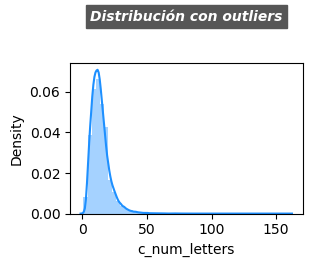

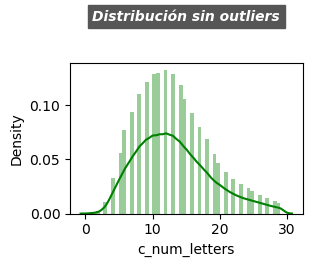

Para la columna c_long_avg_word se tiene:
Número de outliers por IQR: 2467
Número de outliers por percentiles .5 y .95: 6076
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 2467 outliers comúnes = 0.028734828895566892%


count    2467.000000
mean       12.414437
std         2.509637
min        10.333333
10%        11.000000
20%        11.000000
30%        11.000000
40%        11.000000
50%        12.000000
60%        12.000000
70%        13.000000
80%        13.000000
90%        15.000000
100%       46.000000
max        46.000000
Name: c_long_avg_word, dtype: float64

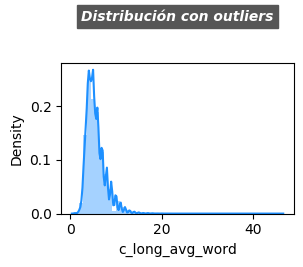

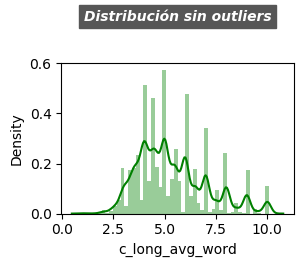

Para la columna c_n_actors se tiene:
Número de outliers por IQR: 10527
Número de outliers por percentiles .5 y .95: 4042
Los datos distribuyen normal
Número de outliers por z-score: 1588
Hay 1588 outliers comúnes = 0.01849651734339693%


count    1588.000000
mean        3.145466
std         0.945722
min         1.000000
10%         2.000000
20%         2.000000
30%         3.000000
40%         3.000000
50%         3.000000
60%         4.000000
70%         4.000000
80%         4.000000
90%         4.000000
100%        4.000000
max         4.000000
Name: c_n_actors, dtype: float64

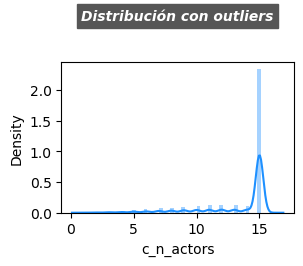

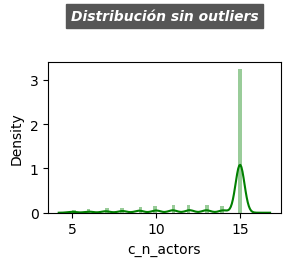

In [63]:
for col in var_c:
    x = outliers_tests(df,col )

Para la columna c_year se tiene:
Número de outliers por IQR: 625
Número de outliers por percentiles .5 y .95: 5636
Los datos no distribuyen normal, se hará una transformación de boxcox
Los datos transformados distribuyen normal
Número de outliers por z-score: 281
Hay 281 outliers comúnes = 0.0032729983460293055%


count     281.000000
mean     1917.455516
std         3.079711
min      1894.000000
10%      1914.000000
20%      1915.000000
30%      1916.000000
40%      1917.000000
50%      1918.000000
60%      1919.000000
70%      1920.000000
80%      1920.000000
90%      1921.000000
100%     1921.000000
max      1921.000000
Name: c_year, dtype: float64

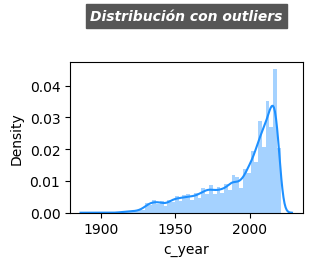

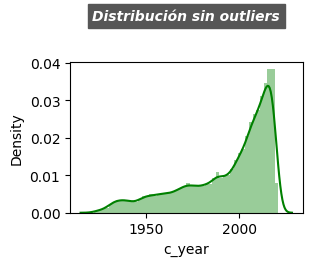

Se borraron 281 registros
Para la columna c_duration se tiene:
Número de outliers por IQR: 5752
Número de outliers por percentiles .5 y .95: 8190
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 4807 outliers comúnes = 0.05617426057284424%


count    4807.00000
mean      151.39172
std        46.70912
min        41.00000
10%        57.00000
20%       145.00000
30%       148.00000
40%       150.00000
50%       154.00000
60%       158.00000
70%       162.00000
80%       169.00000
90%       181.00000
100%      808.00000
max       808.00000
Name: c_duration, dtype: float64

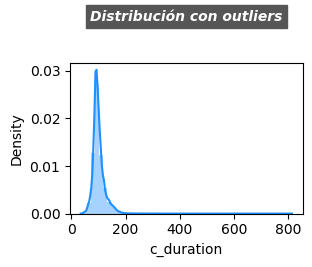

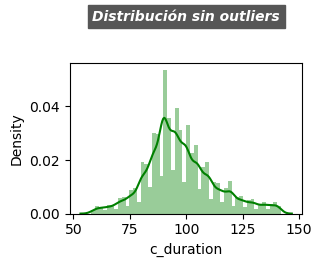

Se borraron 4807 registros
Para la columna c_votes se tiene:
Número de outliers por IQR: 12727
Número de outliers por percentiles .5 y .95: 7890
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 4039 outliers comúnes = 0.0500086670133472%


count    4.039000e+03
mean     1.392571e+05
std      1.605222e+05
min      3.253600e+04
10%      3.862660e+04
20%      4.583020e+04
30%      5.441520e+04
40%      6.719820e+04
50%      8.297800e+04
60%      1.033064e+05
70%      1.348274e+05
80%      1.912886e+05
90%      2.993766e+05
100%     2.278845e+06
max      2.278845e+06
Name: c_votes, dtype: float64

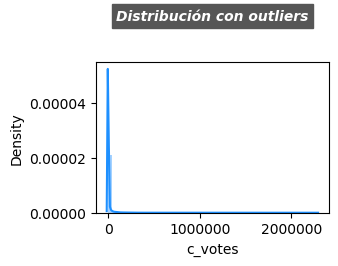

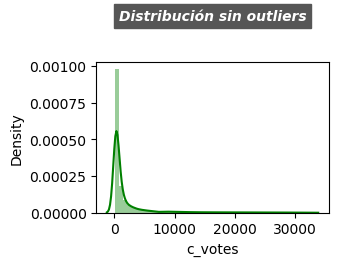

Se borraron 4039 registros
Para la columna c_reviews_from_users se tiene:
Número de outliers por IQR: 7170
Número de outliers por percentiles .5 y .95: 3482
Los datos distribuyen normal
Número de outliers por z-score: 882
Hay 882 outliers comúnes = 0.011495301523583615%


count     882.000000
mean      263.368481
std       260.535555
min       163.000000
10%       168.000000
20%       176.000000
30%       185.000000
40%       195.000000
50%       210.000000
60%       229.000000
70%       258.700000
80%       301.800000
90%       374.000000
100%     5261.000000
max      5261.000000
Name: c_reviews_from_users, dtype: float64

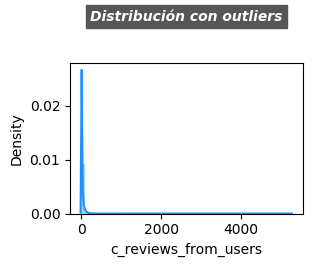

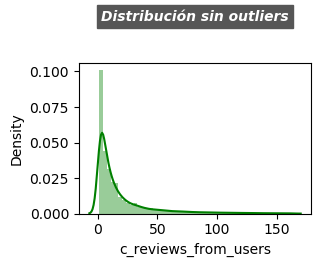

Se borraron 882 registros
Para la columna c_reviews_from_critics se tiene:
Número de outliers por IQR: 6036
Número de outliers por percentiles .5 y .95: 3253
Los datos distribuyen normal
Número de outliers por z-score: 1515
Hay 1515 outliers comúnes = 0.01997494890895906%


count    1515.000000
mean      127.806601
std        37.287472
min        90.000000
10%        93.000000
20%        98.000000
30%       103.000000
40%       108.600000
50%       117.000000
60%       126.000000
70%       137.000000
80%       152.000000
90%       178.000000
100%      373.000000
max       373.000000
Name: c_reviews_from_critics, dtype: float64

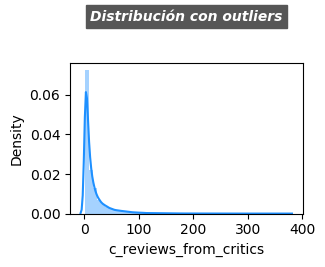

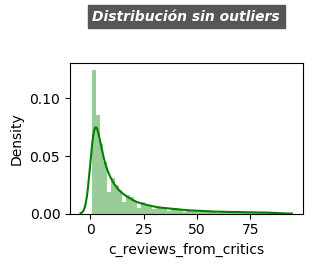

Se borraron 1515 registros
Para la columna c_num_words se tiene:
Número de outliers por IQR: 1035
Número de outliers por percentiles .5 y .95: 2067
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 1035 outliers comúnes = 0.013924391228306202%


count    1035.000000
mean        9.245411
std         2.094865
min         8.000000
10%         8.000000
20%         8.000000
30%         8.000000
40%         8.000000
50%         9.000000
60%         9.000000
70%         9.000000
80%        10.000000
90%        11.000000
100%       37.000000
max        37.000000
Name: c_num_words, dtype: float64

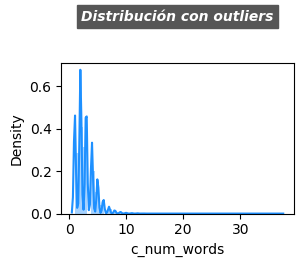

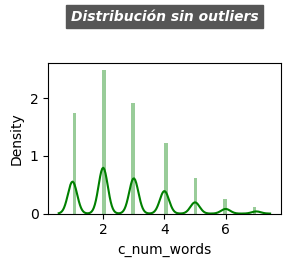

Se borraron 1035 registros
Para la columna c_num_letters se tiene:
Número de outliers por IQR: 1651
Número de outliers por percentiles .5 y .95: 4775
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 1651 outliers comúnes = 0.02252541101030084%


count    1651.000000
mean       34.070866
std         4.435033
min        30.000000
10%        30.000000
20%        31.000000
30%        31.000000
40%        32.000000
50%        33.000000
60%        34.000000
70%        35.000000
80%        37.000000
90%        40.000000
100%       66.000000
max        66.000000
Name: c_num_letters, dtype: float64

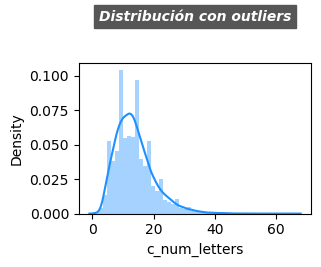

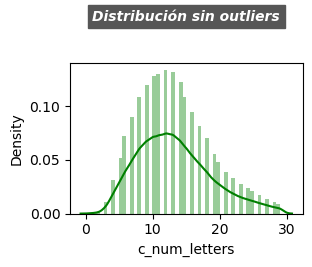

Se borraron 1651 registros
Para la columna c_long_avg_word se tiene:
Número de outliers por IQR: 2055
Número de outliers por percentiles .5 y .95: 5083
Los datos no distribuyen normal, se hará una transformación de boxcox
los datos no se pudieron tranformar a una normal, no se puede aplicar z-score
Hay 2055 outliers comúnes = 0.028683490592373403%


count    2055.000000
mean       12.357421
std         2.064529
min        10.500000
10%        11.000000
20%        11.000000
30%        11.000000
40%        11.000000
50%        12.000000
60%        12.000000
70%        13.000000
80%        13.000000
90%        15.000000
100%       29.000000
max        29.000000
Name: c_long_avg_word, dtype: float64

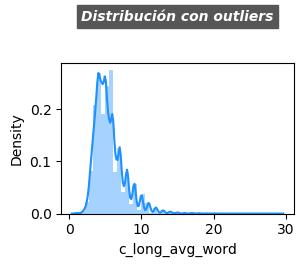

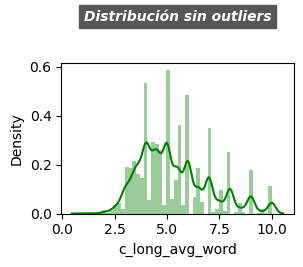

Se borraron 2055 registros
Para la columna c_n_actors se tiene:
Número de outliers por IQR: 8916
Número de outliers por percentiles .5 y .95: 3367
Los datos distribuyen normal
Número de outliers por z-score: 1311
Hay 1311 outliers comúnes = 0.01883918435384903%


count    1311.000000
mean        3.181541
std         0.917511
min         1.000000
10%         2.000000
20%         2.000000
30%         3.000000
40%         3.000000
50%         3.000000
60%         4.000000
70%         4.000000
80%         4.000000
90%         4.000000
100%        4.000000
max         4.000000
Name: c_n_actors, dtype: float64

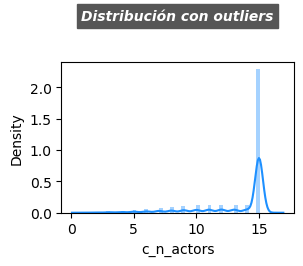

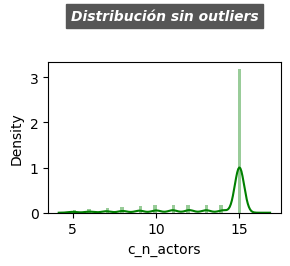

Se borraron 1311 registros


In [64]:
for col in var_c:
    x = outliers_tests(df,col )
    df = df[~df.index.isin(x)]
    print("Se borraron " + str(len(x)) + " registros")
    df.reset_index(drop=True, inplace = True)

In [65]:
df.shape

(68278, 41)

In [66]:
1 - 68278 / 85854

0.20471964031961232

# Missings 

In [67]:
missings = completitud(df)
missings = missings[missings["completitud"] < 100]
missings

,columna,total,completitud
0,c_reviews_from_critics,9337,86.325024
1,c_reviews_from_users,6173,90.959020
2,v_language_en,658,99.036293
3,v_country_usa,49,99.928235
4,c_n_actors,48,99.929699


In [68]:
np.sort(df["c_reviews_from_critics"].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., nan])

In [69]:
df["c_reviews_from_critics"][df["c_reviews_from_critics"].isnull()] = 0
np.sort(df["c_reviews_from_critics"].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89.])

In [70]:
np.sort(df["c_reviews_from_users"].unique())

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [71]:
df["c_reviews_from_users"][df["c_reviews_from_users"].isnull()] = 0
np.sort(df["c_reviews_from_users"].unique())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [72]:
missings = completitud(df)
missings = missings[missings["completitud"] < 100]
missings

,columna,total,completitud
0,v_language_en,658,99.036293
1,v_country_usa,49,99.928235
2,c_n_actors,48,99.929699


In [73]:
df_aux = df_orig[['t_imdb_title_id', 'v_language', 'v_country']]
df_aux

,t_imdb_title_id,v_language,v_country
0,tt0000009,none,usa
1,tt0000574,none,australia
2,tt0001892,NaN,"germany, denmark"
3,tt0002101,english,usa
4,tt0002130,italian,italy
...,...,...,...
85849,tt8845322,portuguese,"brazil, france"
85850,tt8888056,arabic,egypt
85851,tt8890158,english,usa
85852,tt8907932,bengali,india


In [74]:
df = pd.merge(df, df_aux, how="left", on = "t_imdb_title_id")
df.head(3)

,t_imdb_title_id,c_year,c_duration,c_avg_vote,c_votes,c_reviews_from_users,c_reviews_from_critics,v_day_week,v_weekend,v_day_month,c_num_words,c_num_letters,c_long_avg_word,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,filmnoir,history,horror,music,musical,mystery,news,realitytv,romance,scifi,sport,thriller,war,western,v_country_usa,v_language_en,c_n_actors,v_language,v_country
0,tt0009937,1924,99,7.0,1325,12.0,17.0,3,0,6,2,13,6.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,1.0,13.0,english,usa
1,tt0011294,1924,80,7.1,165,3.0,6.0,4,0,5,4,23,5.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,5.0,french,france
2,tt0011439,1922,79,7.1,2145,37.0,23.0,5,0,23,4,14,3.50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1.0,NaN,11.0,NaN,usa


In [75]:
corpus=" ".join(df["v_language"][~pd.isnull(df["v_language"])]).replace(",", "")
fdist=FreqDist(corpus.split())
print(len(fdist))
fdist

250


FreqDist({'english': 38066, 'french': 6533, 'spanish': 4457, 'italian': 3777, 'german': 3488, 'japanese': 2754, 'russian': 2027, 'mandarin': 1588, 'turkish': 1509, 'hindi': 1496, ...})

In [76]:
corpus=" ".join(df["v_country"][~pd.isnull(df["v_country"])]).replace(",", "")
fdist=FreqDist(corpus.split())
print(len(fdist))
fdist

208


FreqDist({'usa': 27048, 'france': 6674, 'uk': 5734, 'italy': 4244, 'germany': 3649, 'india': 3082, 'canada': 2810, 'japan': 2627, 'spain': 2337, 'hong': 1622, ...})

In [77]:
df.drop(columns=['v_language_en', 'v_country_usa' ],inplace=True)

In [78]:
df.drop(columns=['t_imdb_title_id'],inplace=True)

In [79]:
X_train,X_test=train_test_split(df,test_size=.2,random_state=413)

In [80]:
miss=completitud(X_train)

miss[miss["completitud"]<100]

,columna,total,completitud
0,v_language,535,99.020541
1,v_country,37,99.932262
2,c_n_actors,32,99.941416


In [81]:
x_i=df["v_language"].fillna("english").value_counts()
k=x_i.sum()
p_i=df["v_language"].dropna().value_counts(1)
m_i=k*p_i
from scipy.stats import chisquare
chi=chisquare(f_obs=x_i,f_exp=m_i)
p_val=chi.pvalue
alpha=0.05
if p_val<alpha:
    print("Rechazamos HO(La porporción de categorias es la misma que la general)")
else:
    print("Aceptamos HO(La porporción de categorias es la misma que la general)")

Aceptamos HO(La porporción de categorias es la misma que la general)


In [82]:
X_train["v_language"] = X_train["v_language"].fillna("english")
X_test["v_language"] = X_test["v_language"].fillna("english")

In [83]:
x_i=df["v_country"].fillna("usa").value_counts()
k=x_i.sum()
p_i=df["v_country"].dropna().value_counts(1)
m_i=k*p_i
chi=chisquare(f_obs=x_i,f_exp=m_i)
p_val=chi.pvalue
alpha=0.05
if p_val<alpha:
    print("Rechazamos HO(La porporción de categorias es la misma que la general)")
else:
    print("Aceptamos HO(La porporción de categorias es la misma que la general)")

Aceptamos HO(La porporción de categorias es la misma que la general)


In [84]:
X_train["v_country"] = X_train["v_country"].fillna("usa")
X_test["v_country"] = X_test["v_country"].fillna("usa")

In [85]:
mean=X_train["c_n_actors"].mean()
median=X_train["c_n_actors"].median()
mode=X_train["c_n_actors"].mode()
print("mean: " + str(mean))
print("median: " + str(median))
print("mode: " + str(mode))

mean: 13.587525187763326
median: 15.0
mode: 0    15.0
dtype: float64


In [86]:
from scipy import stats
from scipy.stats import ksone
# Se toma aquel valor que tenga un p-value mayor y un estadistico pequeño
originales=list(df["c_n_actors"].dropna().values)
imputados=list(df["c_n_actors"].fillna(median).values)
stats.ks_2samp(originales,imputados)

Ks_2sampResult(statistic=0.00021084066584919903, pvalue=1.0)

In [87]:
originales=list(df["c_n_actors"].dropna().values)
imputados=list(df["c_n_actors"].fillna(mean).values)
stats.ks_2samp(originales,imputados)

Ks_2sampResult(statistic=0.0005179160880406375, pvalue=1.0)

In [88]:
X_train["c_n_actors"] = X_train["c_n_actors"].fillna(15)
X_test["c_n_actors"] = X_test["c_n_actors"].fillna(15)

In [89]:
completitud(X_train)

,columna,total,completitud
0,c_year,0,100.0
1,fantasy,0,100.0
2,filmnoir,0,100.0
3,history,0,100.0
4,horror,0,100.0
5,music,0,100.0
6,musical,0,100.0
7,mystery,0,100.0
8,family,0,100.0
9,news,0,100.0


In [90]:
X_train["v_country_usa"] = X_train['v_country'].map(lambda x : x if pd.isnull(x) else np.where("usa" in x, 1,0) )
X_train["v_language_en"] = X_train['v_language'].map(lambda x : x if pd.isnull(x) else np.where("english" in x, 1,0) )
X_test["v_country_usa"] = X_test['v_country'].map(lambda x : x if pd.isnull(x) else np.where("usa" in x, 1,0) )
X_test["v_language_en"] = X_test['v_language'].map(lambda x : x if pd.isnull(x) else np.where("english" in x, 1,0) )
X_train.drop(columns=['v_country', 'v_language' ],inplace=True)
X_test.drop(columns=['v_country', 'v_language' ],inplace=True)

# Reducción de dimensión

In [91]:
df_aux=pd.concat([X_test,X_train])
df_aux.reset_index(drop = True, inplace = True)
df_aux.head(3)

,c_year,c_duration,c_avg_vote,c_votes,c_reviews_from_users,c_reviews_from_critics,v_day_week,v_weekend,v_day_month,c_num_words,c_num_letters,c_long_avg_word,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,filmnoir,history,horror,music,musical,mystery,news,realitytv,romance,scifi,sport,thriller,war,western,c_n_actors,v_country_usa,v_language_en
0,1999,85,6.7,4612,34.0,44.0,5,0,5,1,6,6.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13.0,0,0
1,1980,91,7.0,236,4.0,0.0,4,0,18,2,9,4.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.0,0,1
2,2016,105,4.4,803,16.0,8.0,5,0,29,2,12,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,13.0,1,1


In [92]:
df_aux.var()

c_year                    6.040895e+02
c_duration                2.312567e+02
c_avg_vote                1.483862e+00
c_votes                   1.050074e+07
c_reviews_from_users      5.038832e+02
c_reviews_from_critics    2.594606e+02
v_day_week                2.218106e+00
v_weekend                 1.276177e-01
v_day_month               9.010908e+01
c_num_words               1.762892e+00
c_num_letters             3.019035e+01
c_long_avg_word           2.851726e+00
action                    1.129809e-01
adult                     2.929158e-05
adventure                 7.120328e-02
animation                 1.672927e-02
biography                 2.235403e-02
comedy                    2.265922e-01
crime                     1.117638e-01
documentary               2.929158e-05
drama                     2.477449e-01
family                    4.243536e-02
fantasy                   3.821026e-02
filmnoir                  8.983819e-03
history                   2.303834e-02
horror                   

In [93]:
df_aux[[x for x in df_aux if x!="c_avg_vote"]].corr(method="pearson").iplot(kind="heatmap",colorscale="orrd",title="Matriz de Correlación")

In [94]:
corr=df_aux[[x for x in df_aux if x!="c_avg_vote"]].corr(method="pearson")
corr=abs(corr)
for col in corr.columns:
    display(corr[[col]][corr[[col]]>.5].dropna())

,c_year
c_year,1.0


,c_duration
c_duration,1.0


,c_votes
c_votes,1.000000
c_reviews_from_users,0.727953
c_reviews_from_critics,0.596924


,c_reviews_from_users
c_votes,0.727953
c_reviews_from_users,1.000000
c_reviews_from_critics,0.658746


,c_reviews_from_critics
c_votes,0.596924
c_reviews_from_users,0.658746
c_reviews_from_critics,1.000000


,v_day_week
v_day_week,1.000000
v_weekend,0.598949


,v_weekend
v_day_week,0.598949
v_weekend,1.000000


,v_day_month
v_day_month,1.0


,c_num_words
c_num_words,1.000000
c_num_letters,0.797480
c_long_avg_word,0.517699


,c_num_letters
c_num_words,0.79748
c_num_letters,1.00000


,c_long_avg_word
c_num_words,0.517699
c_long_avg_word,1.000000


,action
action,1.0


,adult
adult,1.0


,adventure
adventure,1.0


,animation
animation,1.0


,biography
biography,1.0


,comedy
comedy,1.0


,crime
crime,1.0


,documentary
documentary,1.0


,drama
drama,1.0


,family
family,1.0


,fantasy
fantasy,1.0


,filmnoir
filmnoir,1.0


,history
history,1.0


,horror
horror,1.0


,music
music,1.0


,musical
musical,1.0


,mystery
mystery,1.0


,news
news,1.0


,realitytv
realitytv,1.0


,romance
romance,1.0


,scifi
scifi,1.0


,sport
sport,1.0


,thriller
thriller,1.0


,war
war,1.0


,western
western,1.0


,c_n_actors
c_n_actors,1.0


,v_country_usa
v_country_usa,1.000000
v_language_en,0.695458


,v_language_en
v_country_usa,0.695458
v_language_en,1.000000


In [95]:
cols=['c_votes','c_reviews_from_users','c_reviews_from_critics','v_day_week','v_weekend','c_num_words','c_num_letters','c_long_avg_word','v_country_usa','v_language_en']

In [96]:
for col in cols:
    display(corr[[col]][corr[[col]]>.5].dropna())

,c_votes
c_votes,1.000000
c_reviews_from_users,0.727953
c_reviews_from_critics,0.596924


,c_reviews_from_users
c_votes,0.727953
c_reviews_from_users,1.000000
c_reviews_from_critics,0.658746


,c_reviews_from_critics
c_votes,0.596924
c_reviews_from_users,0.658746
c_reviews_from_critics,1.000000


,v_day_week
v_day_week,1.000000
v_weekend,0.598949


,v_weekend
v_day_week,0.598949
v_weekend,1.000000


,c_num_words
c_num_words,1.000000
c_num_letters,0.797480
c_long_avg_word,0.517699


,c_num_letters
c_num_words,0.79748
c_num_letters,1.00000


,c_long_avg_word
c_num_words,0.517699
c_long_avg_word,1.000000


,v_country_usa
v_country_usa,1.000000
v_language_en,0.695458


,v_language_en
v_country_usa,0.695458
v_language_en,1.000000


In [97]:
df_aux=df_aux.drop(columns=["v_country_usa", "c_num_letters","c_long_avg_word" , "v_weekend", "c_votes"])

In [98]:
df_aux[[x for x in df_aux if x!="c_avg_vote"]].corr(method="pearson").iplot(kind="heatmap",colorscale="orrd",title="Matriz de Correlación")

In [99]:
corr=df_aux.corr(method="pearson")
corr=abs(corr)
corr[["c_avg_vote"]].sort_values(by = 'c_avg_vote',ascending = False).style.background_gradient()
#hasta aquí hay 34 variables

,c_avg_vote
c_avg_vote,1.000000
horror,0.333003
drama,0.314009
c_year,0.259118
v_language_en,0.256974
c_duration,0.231772
scifi,0.172419
thriller,0.157754
action,0.128574
c_reviews_from_critics,0.108971


In [100]:
cols_drop_low_corr=list(corr[corr["c_avg_vote"]<0.03].index)
df_aux=df_aux.drop(columns=cols_drop_low_corr)

In [101]:
corr=df_aux.corr(method="pearson")
corr=abs(corr)
corr[["c_avg_vote"]].sort_values(by = 'c_avg_vote',ascending = False).style.background_gradient()

,c_avg_vote
c_avg_vote,1.000000
horror,0.333003
drama,0.314009
c_year,0.259118
v_language_en,0.256974
c_duration,0.231772
scifi,0.172419
thriller,0.157754
action,0.128574
c_reviews_from_critics,0.108971


In [102]:
X=df_aux[[x for x in df_aux if x!="c_avg_vote"]]

aux=calc_vif(X)

aux[aux.VIF > 5]

,variables,VIF
0,c_year,85.713362
1,c_duration,51.604949
22,c_n_actors,30.426688
4,v_day_week,9.024287


In [103]:
df_aux.drop(columns = "c_year", inplace = True)
X=df_aux[[x for x in df_aux if x!="c_avg_vote"]]
aux=calc_vif(X)
aux[aux.VIF > 5]

,variables,VIF
0,c_duration,26.636803
21,c_n_actors,22.750700
3,v_day_week,8.284598


In [104]:
df_aux.drop(columns = "c_duration", inplace = True)
X=df_aux[[x for x in df_aux if x!="c_avg_vote"]]
aux=calc_vif(X)
aux[aux.VIF > 5]

,variables,VIF
20,c_n_actors,10.331337
2,v_day_week,7.369929


In [105]:
vars_deleted = ["v_country_usa", "c_num_letters","c_long_avg_word" , "v_weekend", "c_votes", "c_year", "c_duration"] + cols_drop_low_corr
vars_deleted

['v_country_usa',
 'c_num_letters',
 'c_long_avg_word',
 'v_weekend',
 'c_votes',
 'c_year',
 'c_duration',
 'c_num_words',
 'adult',
 'comedy',
 'documentary',
 'family',
 'mystery',
 'news',
 'realitytv',
 'sport',
 'western']

In [106]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train.drop(columns = vars_deleted, inplace = True )
X_test.drop(columns = vars_deleted, inplace = True )

df_train=X_train[[x for x in X_train if x!="c_avg_vote"]]
df_test=X_train[[x for x in X_train if x!="c_avg_vote"]]
y_train=X_train[["c_avg_vote"]]
y_test=X_test[["c_avg_vote"]]

scaler = StandardScaler()
scaler.fit(df_train)
df_train_sc=pd.DataFrame(scaler.transform(df_train))
df_test_sc=pd.DataFrame(scaler.transform(df_train))

df_train_sc.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04,5.462200e+04
mean,-2.932105e-16,7.788106e-16,-6.718819e-17,2.065077e-17,-8.510314e-17,-2.466355e-15,1.220363e-15,-2.901991e-15,-1.012309e-15,9.183659e-16,7.221663e-16,3.560486e-15,-3.000339e-15,-2.280933e-15,1.792569e-15,-5.373155e-16,7.973801e-16,-1.006665e-15,-3.170510e-15,-5.401082e-16,1.027394e-15,5.548717e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-6.840898e-01,-7.354197e-01,-2.149233e+00,-1.374930e+00,-3.878418e-01,-2.893559e-01,-1.316813e-01,-1.539125e-01,-3.841160e-01,-1.101132e+00,-2.027637e-01,-9.553280e-02,-1.557104e-01,-3.528284e-01,-1.411504e-01,-1.526613e-01,-4.421145e-01,-2.021758e-01,-3.934452e-01,-1.669988e-01,-3.323097e+00,-1.143481e+00
25%,-5.950511e-01,-6.109836e-01,-8.055673e-01,-9.537772e-01,-3.878418e-01,-2.893559e-01,-1.316813e-01,-1.539125e-01,-3.841160e-01,-1.101132e+00,-2.027637e-01,-9.553280e-02,-1.557104e-01,-3.528284e-01,-1.411504e-01,-1.526613e-01,-4.421145e-01,-2.021758e-01,-3.934452e-01,-1.669988e-01,-2.276517e-01,-1.143481e+00
50%,-3.724542e-01,-4.243294e-01,5.380985e-01,-6.183671e-03,-3.878418e-01,-2.893559e-01,-1.316813e-01,-1.539125e-01,-3.841160e-01,9.081563e-01,-2.027637e-01,-9.553280e-02,-1.557104e-01,-3.528284e-01,-1.411504e-01,-1.526613e-01,-4.421145e-01,-2.021758e-01,-3.934452e-01,-1.669988e-01,5.462096e-01,8.745224e-01
75%,1.172588e-01,1.978512e-01,5.380985e-01,8.361217e-01,-3.878418e-01,-2.893559e-01,-1.316813e-01,-1.539125e-01,-3.841160e-01,9.081563e-01,-2.027637e-01,-9.553280e-02,-1.557104e-01,-3.528284e-01,-1.411504e-01,-1.526613e-01,-4.421145e-01,-2.021758e-01,-3.934452e-01,-1.669988e-01,5.462096e-01,8.745224e-01
max,6.528048e+00,4.801988e+00,1.881764e+00,1.783715e+00,2.578371e+00,3.455952e+00,7.594093e+00,6.497200e+00,2.603380e+00,9.081563e-01,4.931849e+00,1.046761e+01,6.422180e+00,2.834239e+00,7.084640e+00,6.550447e+00,2.261858e+00,4.946191e+00,2.541650e+00,5.988067e+00,9.331402e-01,8.745224e-01


In [107]:
pca = PCA(n_components=22)
pca.fit(df_train_sc)
X_train_pca=pd.DataFrame(pca.transform(df_train_sc))
X_test_pca=pd.DataFrame(pca.transform(df_test_sc))
varianza=list(pca.explained_variance_ratio_)
varianza=list(map(lambda x:sum(varianza[:x]),range(1,len(varianza)+1)))
cp=pd.DataFrame()
cp["n_componente"]=range(1,23)
cp["varianza"]=varianza
fig = go.Figure(data=go.Scatter(x=cp["n_componente"], y=cp["varianza"], marker_color = 'blue', mode='lines+markers'))
fig.show()

In [108]:
X_train_final = X_train_pca.iloc[:, list(range(0, 16))]
X_train_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.588971,0.050422,-0.279910,0.238035,0.367554,0.004668,0.112472,0.113532,-0.562895,-0.299942,-0.770713,-0.136644,-0.141208,0.605897,-0.642413,0.317310
1,-0.976129,-0.586911,0.026646,-0.107808,0.042023,-0.090799,-1.713783,0.691034,0.747217,0.212535,0.181303,0.386407,0.851242,0.508495,0.591643,-0.087726
2,0.893736,-1.420063,-1.346896,-0.760285,0.751259,-0.229433,1.223499,0.068756,-0.200506,-0.322238,-0.744003,-0.607052,0.212461,0.380899,0.699530,-0.353874
3,-0.980032,-0.881702,-0.282587,-0.038585,0.327046,-0.386375,0.509369,0.101037,-0.311141,-0.258336,-0.885282,-0.237295,-0.044347,0.491488,-0.247579,0.433163
4,-1.538815,0.060846,-0.304053,0.224965,0.468523,-0.012998,0.143736,0.087491,-0.828862,0.203538,-0.372273,-0.061762,-0.370316,0.613752,-0.735145,0.327727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54617,-0.023951,-1.536127,1.756896,-0.072189,-0.499189,0.233609,0.490918,-0.187783,0.185256,-0.009694,1.085287,-0.138622,-0.376749,-0.524370,1.075083,-1.261476
54618,1.219983,0.003170,-0.162951,-0.895843,0.897905,0.581823,-1.398020,0.011915,-0.461284,-0.647918,0.833934,3.595710,-0.088653,2.377288,-1.656821,0.956262
54619,0.610288,0.462773,0.847726,2.866180,-0.455439,-1.101998,-0.771480,-0.267255,0.079731,-0.186461,-0.279683,0.710789,0.284735,-0.531504,-0.399062,-0.081920
54620,-0.397560,-0.751830,-0.398299,-0.155043,0.060410,-0.396077,0.954333,-0.157450,-0.319969,0.206671,0.185963,-0.145466,-0.140116,0.165760,0.342434,-0.445743
